In [1]:
!unzip bankruptcy_dataset.zip -d /tmp

Archive:  bankruptcy_dataset.zip
  inflating: /tmp/bankruptcy_dataset.csv  


In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('/tmp/bankruptcy_dataset.csv')

# What data you are dealing with

In [4]:
df['registration_date'] = pd.to_datetime(df['registration_date'])
df['finance_year_start_date'] = pd.to_datetime(df['finance_year_start_date'])
df['finance_year_end_date'] = pd.to_datetime(df['finance_year_end_date'])
df['document_registration_date'] = pd.to_datetime(df['document_registration_date'])

In [5]:
df.head(n=10)

,code,registration_date,legal_form_name,status_name,finance_year_start_date,finance_year_end_date,document_registration_date,equity,liabilities,long_term_financial_assets,...,idx_lia_fin_as_ratio,idx_sh_fin_as_lia_ratio,idx_fin_as_eq_ratio,idx_fin_as_lia_ratio,idx_n_prof_fin_as_ratio,idx_s_rev_fin_as_ratio,idx_prof_tax_eq_ratio,idx_prof_tax_fin_as_ratio,is_bankrupted_last_year,is_bankrupted_all_years
0,110001436,1991-04-02,Private Limited Liability Company,Under Liquidation,2013-01-01,2013-12-31,2018-04-12,1474658.0,166.0,1140507.0,...,0.000113,2013.957831,1.000113,8884.481928,-0.902718,NaN,-0.902820,-0.902718,0,0
1,110001436,1991-04-02,Private Limited Liability Company,Under Liquidation,2014-01-01,2014-12-31,2018-04-02,1195171.0,836.0,1097226.0,...,0.000699,118.159091,1.000699,1430.630383,0.004522,NaN,0.004738,0.004735,0,0
2,110001436,1991-04-02,Private Limited Liability Company,Under Liquidation,2015-01-01,2015-12-31,2018-04-02,346902.0,180.0,316934.0,...,0.000519,167.488889,1.000519,1928.233333,0.002181,NaN,0.002286,0.002285,0,0
3,110001436,1991-04-02,Private Limited Liability Company,Under Liquidation,2016-01-01,2016-12-31,2018-04-02,343801.0,158.0,316142.0,...,0.000459,176.056962,1.000460,2176.955696,-0.009016,NaN,NaN,NaN,0,0
4,110001436,1991-04-02,Private Limited Liability Company,Under Liquidation,2017-01-01,2017-12-31,2018-04-02,2415.0,244.0,0.0,...,0.091764,10.897541,1.101035,10.897541,-128.388868,NaN,NaN,NaN,0,0
5,110003259,1991-04-15,Private Limited Liability Company,Liquidation being initiated,2014-01-01,2014-12-31,2015-06-03,-12703.0,86775.0,11781.0,...,1.171495,0.717845,-5.831064,0.853610,-0.089710,NaN,0.523105,-0.089710,0,0
6,110003782,1991-04-25,Private Limited Liability Company,Removed,2014-01-01,2014-12-31,2015-02-24,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
7,110003782,1991-04-25,Private Limited Liability Company,Removed,2015-01-01,2015-12-31,2016-05-18,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
8,110003978,1991-04-25,Private Limited Liability Company,No legal proceedings,2014-01-01,2014-12-31,2015-06-01,4984590.0,78795.0,3596263.0,...,0.015562,18.619481,1.015808,64.260232,0.020901,0.112119,0.022468,0.022118,0,0
9,110003978,1991-04-25,Private Limited Liability Company,No legal proceedings,2015-01-01,2015-12-31,2016-05-16,1470585.0,28789.0,1039590.0,...,0.019201,15.970822,1.019577,52.081489,0.041539,0.118591,0.044699,0.043840,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805176 entries, 0 to 805175
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   code                         805176 non-null  int64         
 1   registration_date            805176 non-null  datetime64[ns]
 2   legal_form_name              805176 non-null  object        
 3   status_name                  805176 non-null  object        
 4   finance_year_start_date      805176 non-null  datetime64[ns]
 5   finance_year_end_date        805176 non-null  datetime64[ns]
 6   document_registration_date   805176 non-null  datetime64[ns]
 7   equity                       801969 non-null  float64       
 8   liabilities                  715708 non-null  float64       
 9   long_term_financial_assets   798849 non-null  float64       
 10  short_term_financial_assets  798285 non-null  float64       
 11  profit_before_taxes       

In [7]:
df.describe()

,code,equity,liabilities,long_term_financial_assets,short_term_financial_assets,profit_before_taxes,net_profit,sales_revenue,idx_eq_lia_ratio,idx_lia_fin_as_ratio,idx_sh_fin_as_lia_ratio,idx_fin_as_eq_ratio,idx_fin_as_lia_ratio,idx_n_prof_fin_as_ratio,idx_s_rev_fin_as_ratio,idx_prof_tax_eq_ratio,idx_prof_tax_fin_as_ratio,is_bankrupted_last_year,is_bankrupted_all_years
count,8.051760e+05,8.019690e+05,7.157080e+05,7.988490e+05,7.982850e+05,5.460440e+05,6.965110e+05,6.225920e+05,6.239180e+05,6.880980e+05,6.237830e+05,7.422950e+05,6.237830e+05,676260.000000,615362.000000,534572.000000,531064.000000,805176.000000,805176.000000
mean,2.651804e+08,6.558044e+05,5.371828e+05,7.927724e+05,4.898597e+05,9.626471e+04,6.347111e+04,1.425106e+06,2.845711e+02,4.007461e+01,5.043646e+01,4.831560e+01,2.942284e+02,-3.475905,12.048906,2.510831,-3.641582,0.002031,0.009639
std,6.719325e+07,2.318814e+07,8.296636e+06,2.359756e+07,1.595185e+07,4.734160e+06,2.866738e+06,2.908727e+07,1.118221e+05,6.325095e+03,3.126029e+03,1.374974e+04,1.118404e+05,599.866500,625.367386,806.106864,639.327827,0.045017,0.097704
min,1.100014e+08,-1.973510e+08,-1.679680e+07,-5.810000e+04,-1.295100e+06,-2.290720e+09,-5.683350e+08,-7.967606e+06,-2.662470e+05,-2.357200e+04,-1.093910e+05,-8.479850e+05,-3.595210e+05,-191950.600000,-45224.000000,-28764.500000,-191950.600000,0.000000,0.000000
25%,2.601879e+08,0.000000e+00,1.445000e+03,0.000000e+00,3.540000e+03,-1.668250e+03,-1.782000e+03,1.951200e+04,1.259407e-03,9.010755e-02,5.320309e-01,1.000000e+00,1.026127e+00,-0.058568,0.571103,0.000000,-0.051565,0.000000,0.000000
50%,3.026087e+08,9.418000e+03,2.175000e+04,3.156000e+03,2.449500e+04,1.482000e+03,9.510000e+02,8.440250e+04,7.169283e-01,4.441932e-01,1.255989e+00,1.224301e+00,1.833750e+00,0.019742,1.482364,0.149649,0.026082,0.000000,0.000000
75%,3.036434e+08,7.429900e+04,1.242340e+05,4.261800e+04,1.206320e+05,2.181200e+04,1.617700e+04,3.656312e+05,3.706167e+00,8.984874e-01,3.705134e+00,2.364611e+00,5.297232e+00,0.172272,2.958461,0.580082,0.188801,0.000000,0.000000
max,3.060481e+08,1.163270e+10,2.974718e+09,6.529710e+09,1.169979e+10,1.555525e+09,1.555487e+09,1.576094e+10,8.753379e+07,4.519172e+06,1.281640e+06,9.898916e+06,8.753379e+07,287904.000000,197379.600000,496064.000000,287904.000000,1.000000,1.000000


# Number of companies in each target class

In [9]:
companies = df.groupby(['code', 'is_bankrupted_all_years']).size().reset_index()

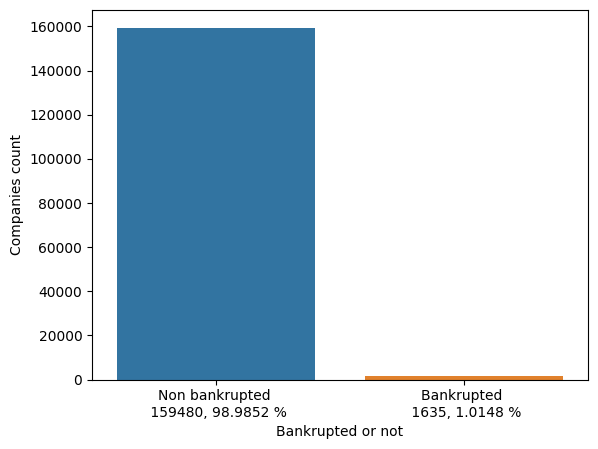

In [10]:
companies_count = companies.is_bankrupted_all_years.value_counts()

sns.barplot(x=companies_count.index, y=companies_count)
plt.xlabel('Bankrupted or not')
plt.ylabel('Companies count')
plt.xticks((0, 1), [f'Non bankrupted \n { companies_count[0] }, { round(companies_count[0] / companies_count.sum() * 100, 5) } %', 
                    f'Bankrupted \n { companies_count[1] }, { round(companies_count[1] / companies_count.sum() * 100, 5) } %'])
plt.show()

# Number of samples of each target class

In [11]:
companies_rows = df.groupby(['is_bankrupted_last_year']).size().to_frame('size').reset_index()

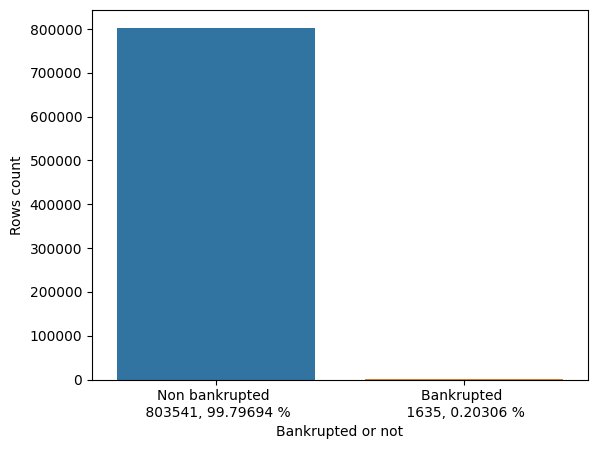

In [12]:
sns.barplot(x=companies_rows['is_bankrupted_last_year'], y=companies_rows['size'])
plt.xlabel('Bankrupted or not')
plt.ylabel('Rows count')
plt.xticks((0, 1), [f"Non bankrupted \n { companies_rows['size'][0] }, { round(companies_rows['size'][0] / companies_rows['size'].sum() * 100, 5) } %", 
                    f"Bankrupted \n { companies_rows['size'][1] }, { round(companies_rows['size'][1] / companies_rows['size'].sum() * 100, 5) } %"])
plt.show()

# Leagal statuses by target class

In [13]:
companies_rows = df.groupby(['status_name', 'is_bankrupted_last_year']).size().to_frame('size').reset_index()

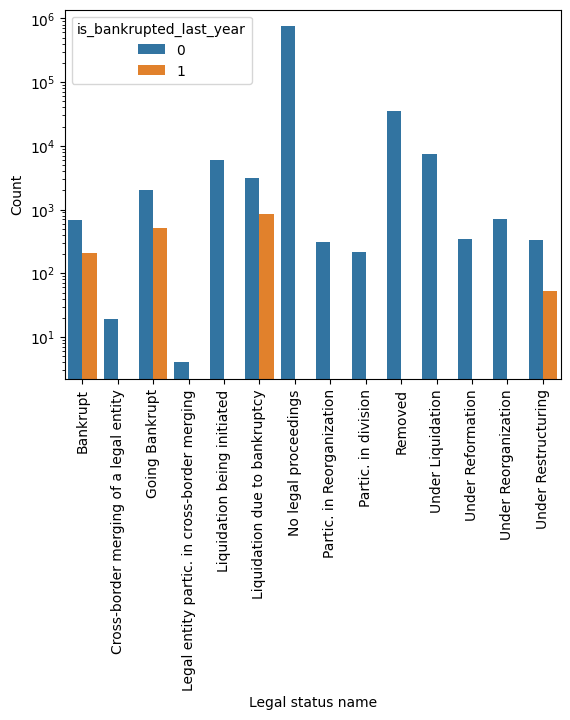

In [14]:
sns.barplot(data=companies_rows, 
            x='status_name', 
            y='size', 
            hue='is_bankrupted_last_year')

plt.yscale('log')
plt.xlabel('Legal status name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Correlation heatmap of each variable

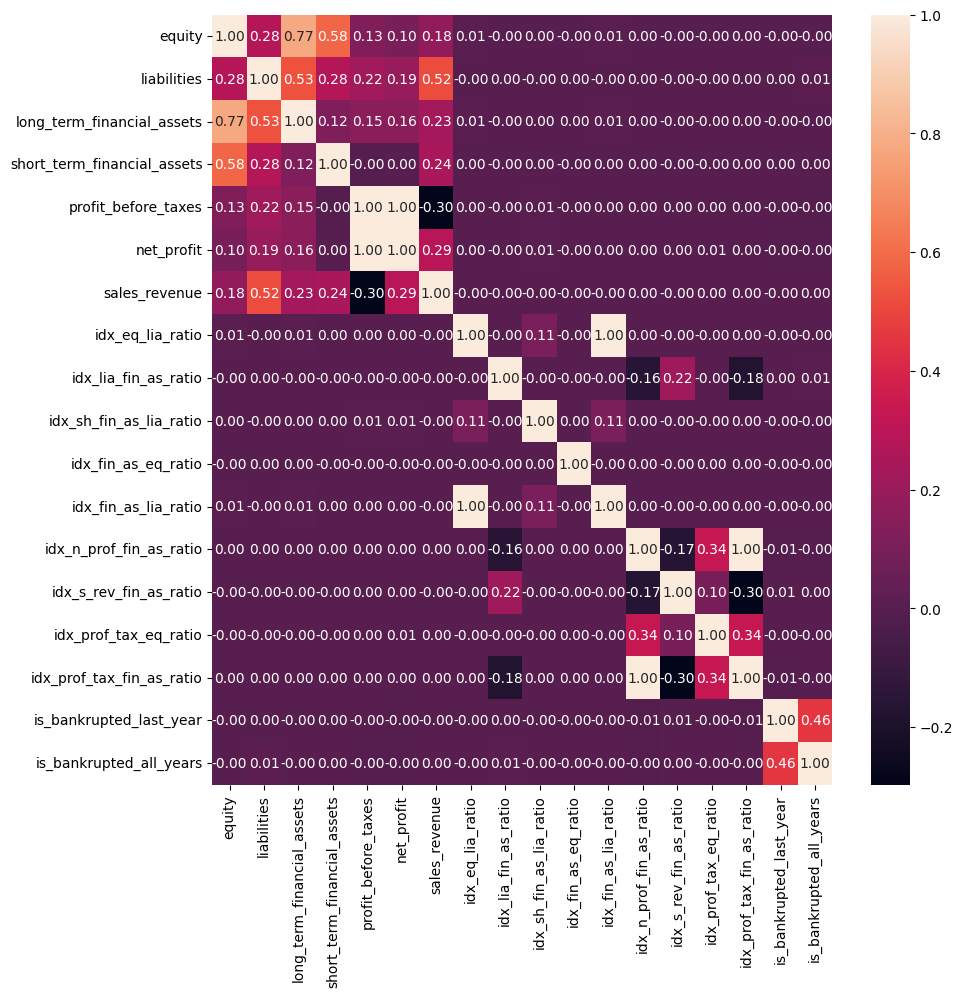

In [15]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(df[df.columns[7:]].corr(), ax=ax, annot=True, fmt='.2f')
plt.show()

# Distribution and boxplots of each variable

In [16]:
def variable_chart(data, variable, hue):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    
    g = sns.kdeplot(df,
             x=variable,
             hue=hue,
             ax=axes[0])
    g.set(yscale='log')
    g.set(xscale='linear')
    g.tick_params(axis='x', labelrotation=90)
    
    g1 = sns.boxplot(df,
                     x='is_bankrupted_last_year', 
                     y=variable,
                     ax=axes[1])
    g1.set(yscale='log')
    
    plt.show()

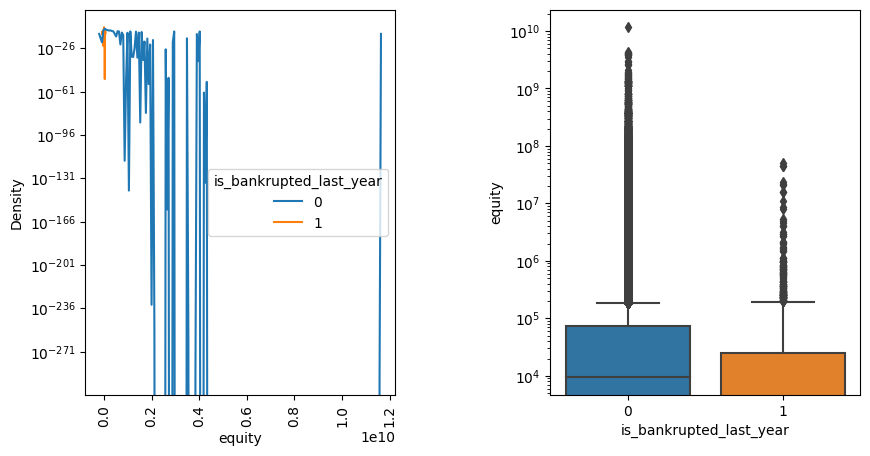

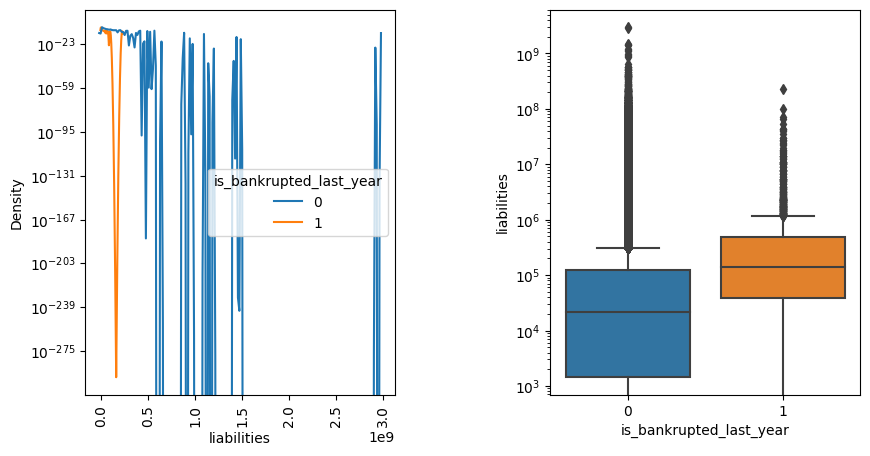

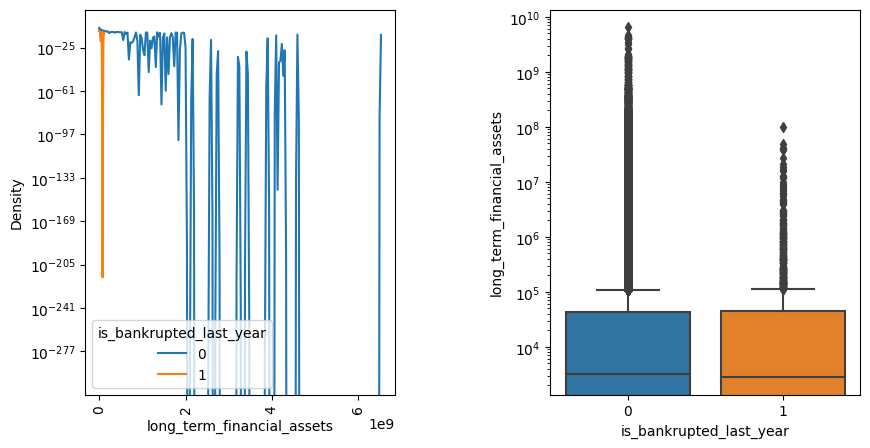

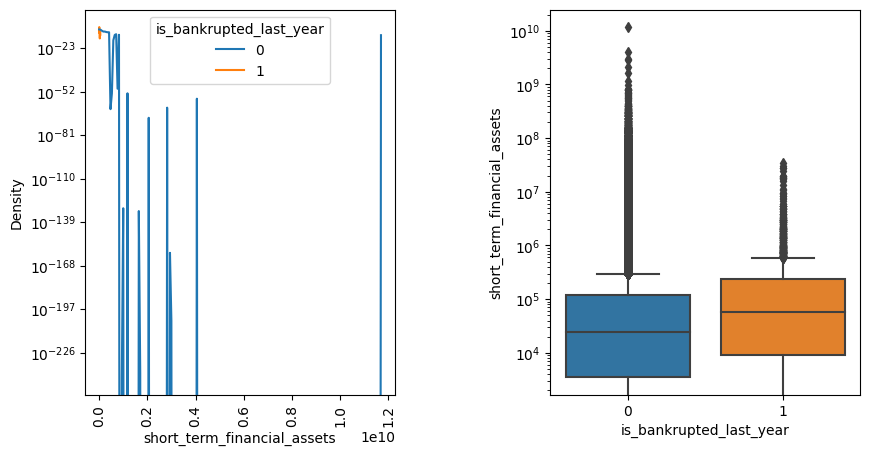

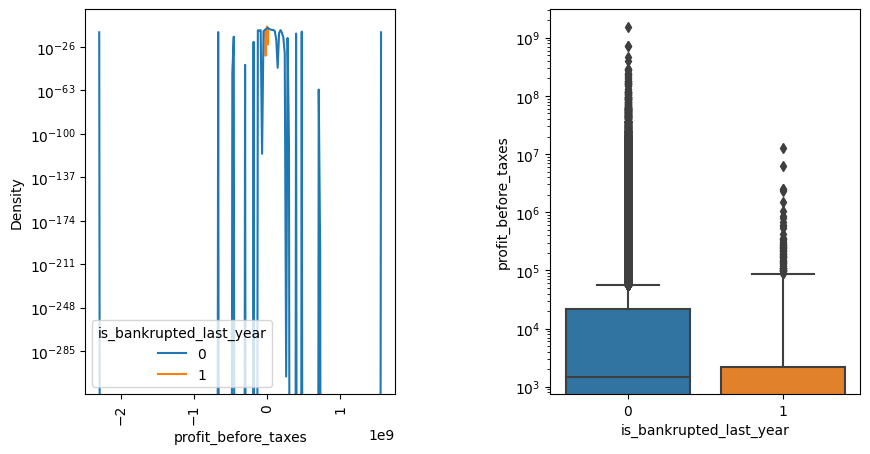

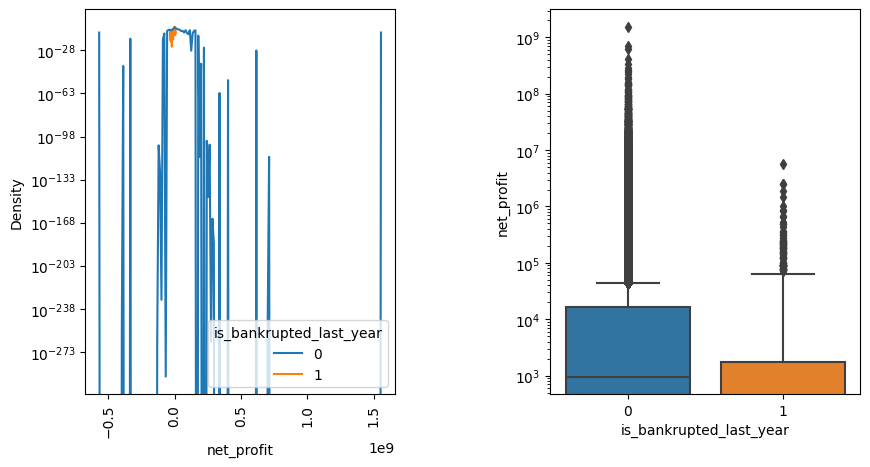

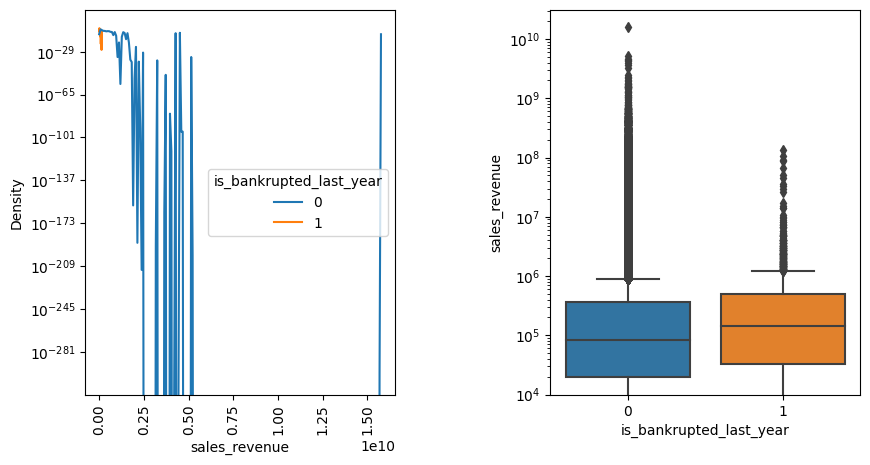

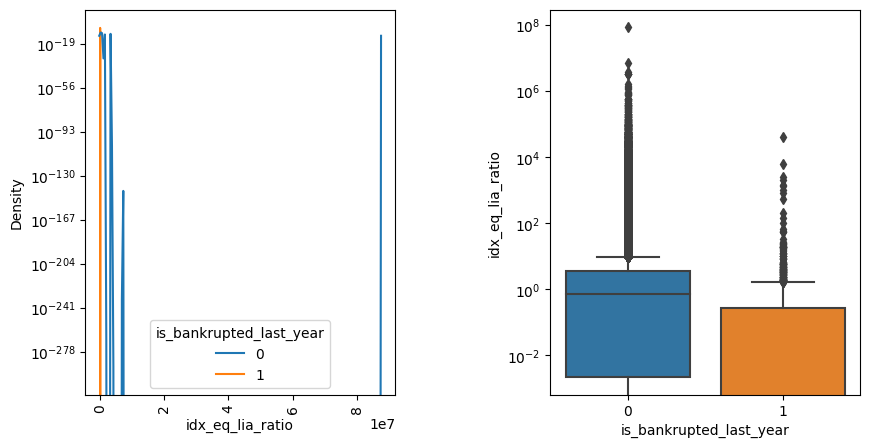

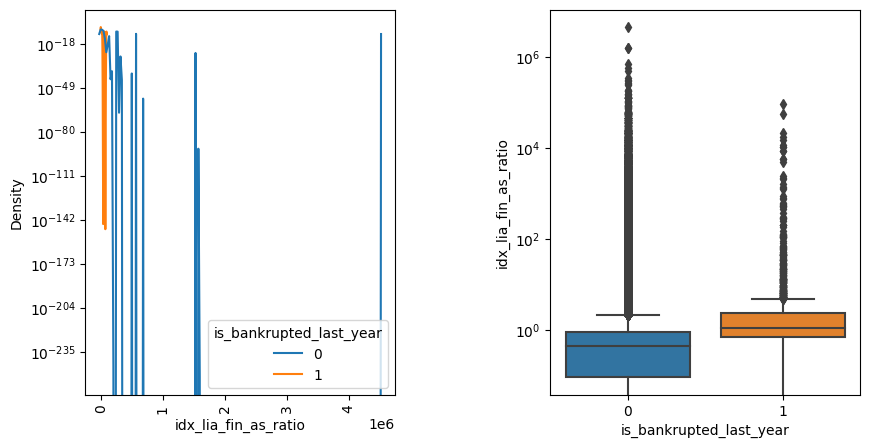

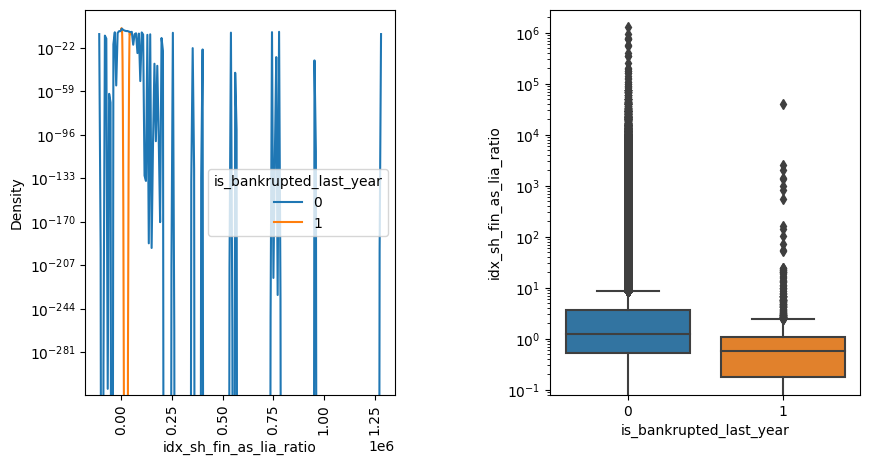

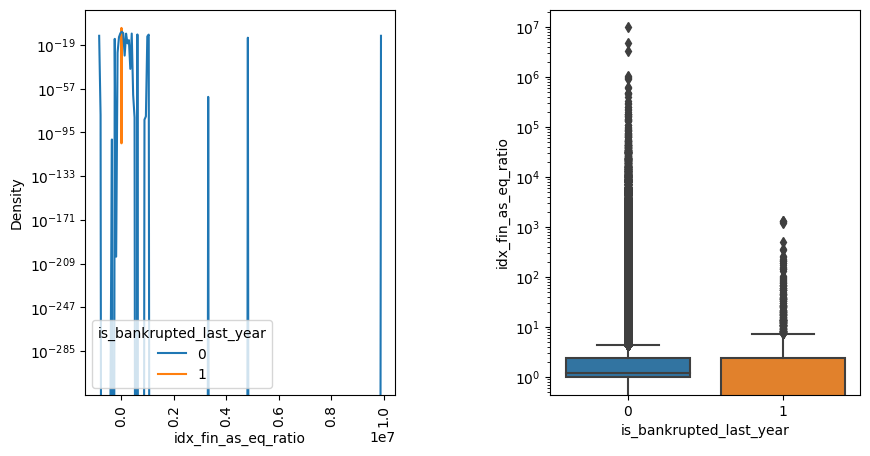

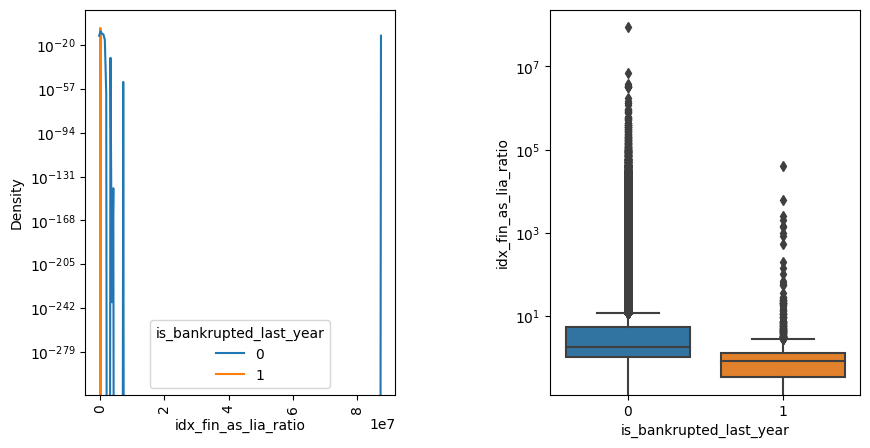

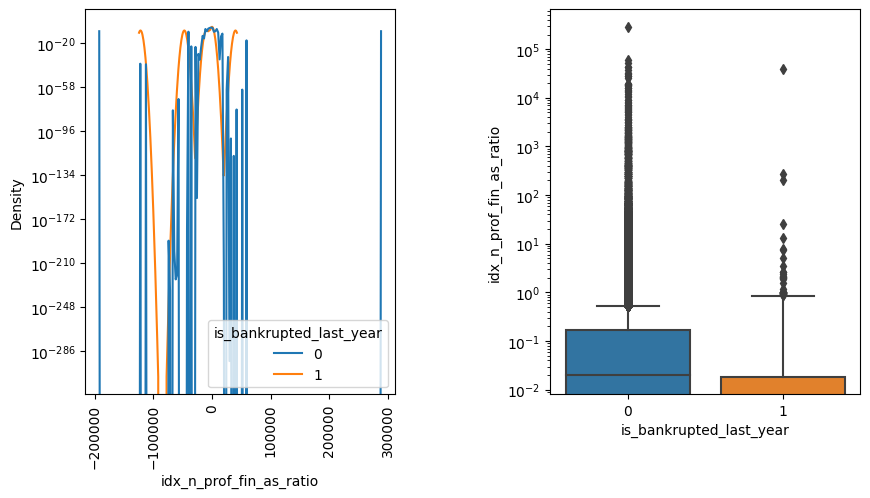

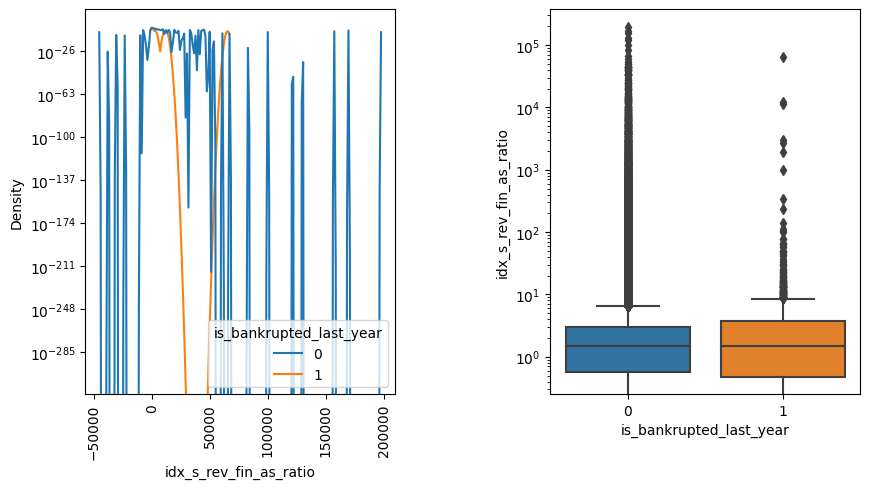

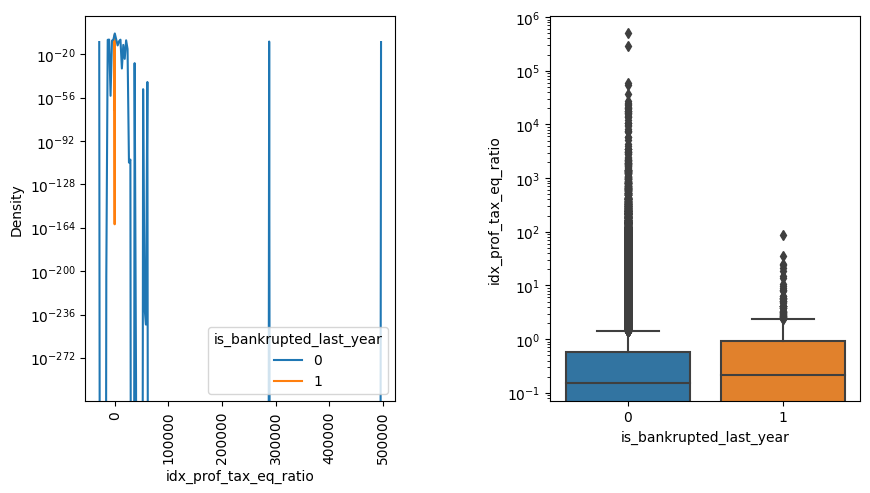

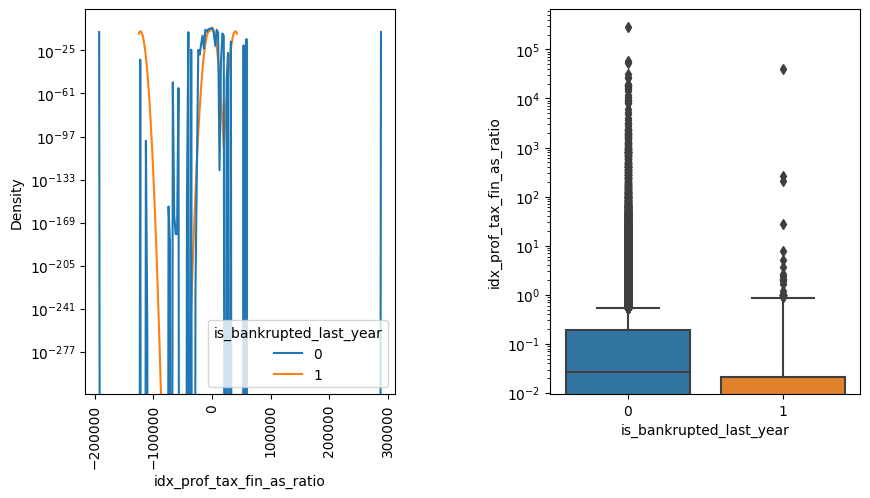

In [17]:
for variable in df.columns[7:-2]:
    variable_chart(df, variable, 'is_bankrupted_last_year')